In [1]:
import numpy as np

In [2]:
def train_perceptron(X, y, w, b, r, L=1000):
    for i in range(L):
        for j in range(X.shape[0]):
            error = y[j] - g(np.dot(X[j], w) + b)
            w += error * X[j] * r
            b += error * r
    return w, b

In [3]:
def g(x):
    return 1 if x > 0 else 0

In [4]:
x = np.array([[3,2, 1], [1,1,1], [1, 2, 3]])
y = np.array([0, 1, 1])

#random weights
w = [0, 0 ,0]
b = 0.5

w, b = train_perceptron(x, y, w, b, .1, 100)
print(w, b)

[-0.2 -0.1  0. ] 0.5


In [7]:
#generate random linearly separable data
data = np.random.rand(100, 2)
labels = np.zeros(100)
for i in range(100):
    if data[i, 0] + data[i, 1] > 1:
        labels[i] = 1

        #add some overlaping data
data = np.concatenate([data, np.random.rand(5, 2)])
labels = np.concatenate([labels, np.ones(5)])

w = np.random.rand(2)
b = np.random.rand(1)

w, b = train_perceptron(data, labels, w, b, .1, 1000)

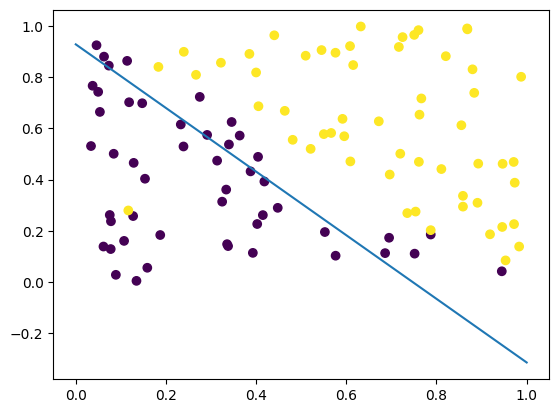

In [8]:
#visualize the data if linearly separable

import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], c=labels)
plt.plot([0, 1], [-b/w[1], (-b-w[0])/w[1]])
plt.show()

In [9]:
import seaborn as sns

#calculate confusion matrix
confusion = np.zeros((2,2))
for i in range(data.shape[0]):
    x = data[i]
    prediction = g(np.dot(x, w) + b)
    confusion[int(labels[i]), prediction] += 1

print(confusion)


[[34. 15.]
 [ 1. 55.]]


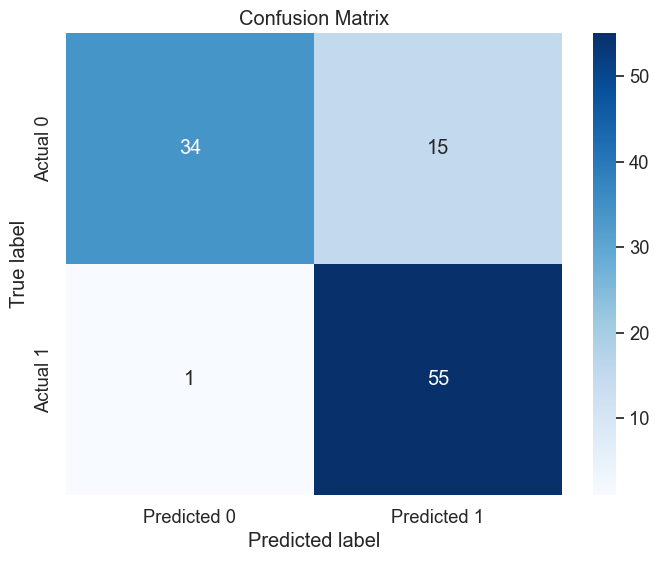

In [10]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust to fit your preferences
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
#calculate accuracy, recall, precision, f1
accuracy = (confusion[0,0] + confusion[1,1]) / np.sum(confusion)
recall = confusion[1,1] / (confusion[1,0] + confusion[1,1])
precision = confusion[1,1] / (confusion[0,1] + confusion[1,1])
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')



Accuracy: 0.85
Recall: 0.98
Precision: 0.79
F1 Score: 0.87


In [12]:
#cost function (gradient descent)
def f(x, w, b):
    w = np.array(w)
    return np.dot(x, w) + b

In [13]:
#adaline algorithm
def train_adaline(X, y, w, b, r, L=1000):
    for i in range(L):
        for j in range(X.shape[0]):
            w = w - r * (f(X[j], w, b) - y[j]) * X[j]
            b = b - r * (f(X[j], w, b) - y[j])
    return w, b

In [57]:
w = np.array([0, 0])
b = 0.5

w, b = train_adaline(data, labels, w, b, .1, 1000)

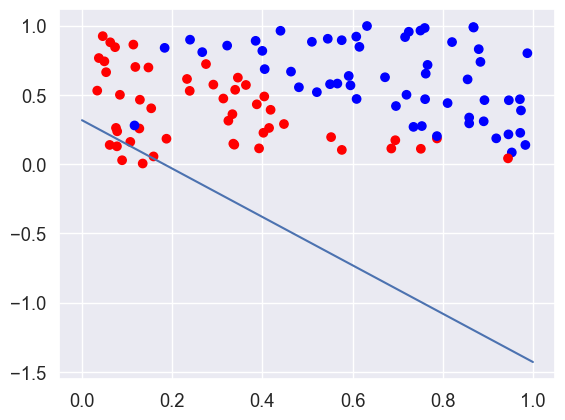

In [58]:
plt.scatter(data[:,0], data[:,1], c=['red' if label == 0 else 'blue' for label in labels])
plt.plot([0, 1], [-b/w[1], (-b-w[0])/w[1]])
plt.show()

In [59]:
#calculate confusion matrix
confusion = np.zeros((2,2))
for i in range(data.shape[0]):
    x = data[i]
    prediction = g(np.dot(x, w) + b)
    confusion[int(labels[i]), prediction] += 1

print(confusion)

[[ 4. 45.]
 [ 0. 56.]]


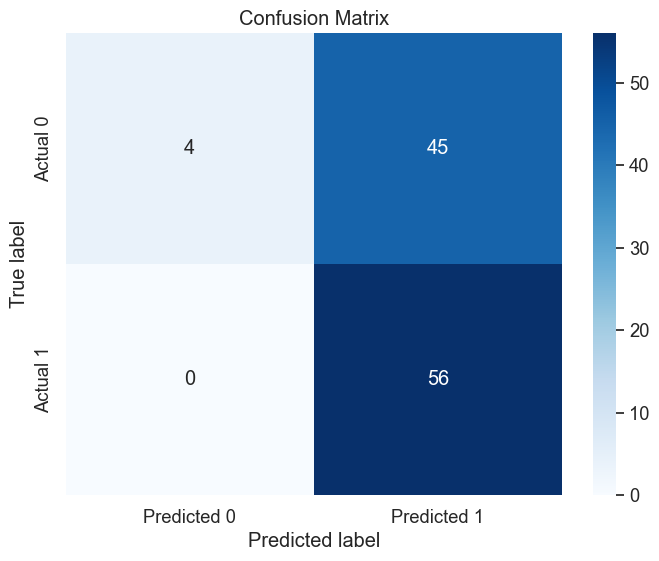

In [60]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust to fit your preferences
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [61]:
#calculate accuracy, recall, precision, f1
accuracy = (confusion[0,0] + confusion[1,1]) / np.sum(confusion)
recall = confusion[1,1] / (confusion[1,0] + confusion[1,1])
precision = confusion[1,1] / (confusion[0,1] + confusion[1,1])
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.57
Recall: 1.00
Precision: 0.55
F1 Score: 0.71
